In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [311]:
!pip install folium

In [312]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [314]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [315]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop('dropoff_datetime', axis = 1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

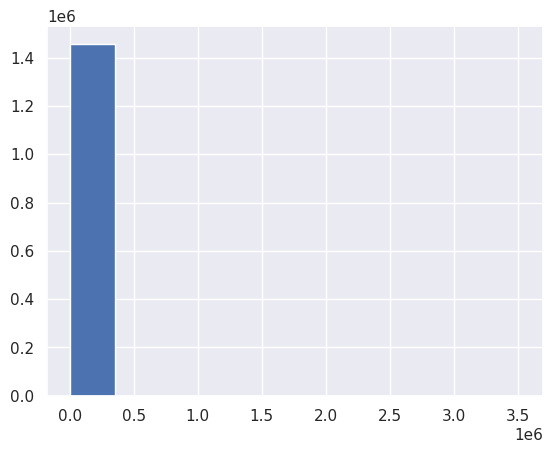

In [316]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df['trip_duration'], bins = 10);

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

<i>Целевая переменная trip_duration не представляет никакого значения для предсказания, поэтому надо пересмотреть её<i>

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE помогает бороться с аномалиями, менее чувствителен к выбросам, а также RMSLE считает процентные отклонения, а не абсолютные, что может быть более удобным для наших данных

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ <h1>TODO<h1>

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [317]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df['trip_duration'])
trip_duration = df['trip_duration']
df = df.drop('trip_duration', axis = 1)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [318]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    n = len(log1p_y_true)
    return np.sqrt((1/n) * np.square(log1p_y_pred - log1p_y_true).sum())

rmsle_best_const = rmsle(df['log_trip_duration'].values, df['log_trip_duration'].mean())
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [319]:
df['day'] = df['pickup_datetime'].dt.dayofyear

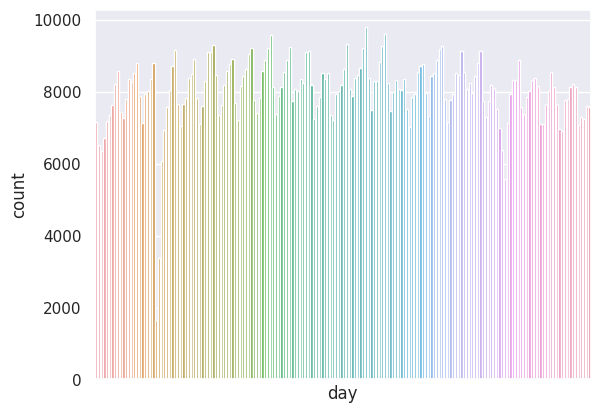

In [320]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.countplot(data= df.sort_values('day'), x = 'day')
plt.xticks([]);

Вопрос: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [321]:
df['day'].value_counts().sort_values(ascending=False).tail(2)

24    3383
23    1648
Name: day, dtype: int64

23 и 24 января власти ввели запрет на передвижение машин в Нью-Йорке из-за снежной бури

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [322]:
df['day_week'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour

In [323]:
week = df['day_week'].value_counts().to_frame()
week = week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

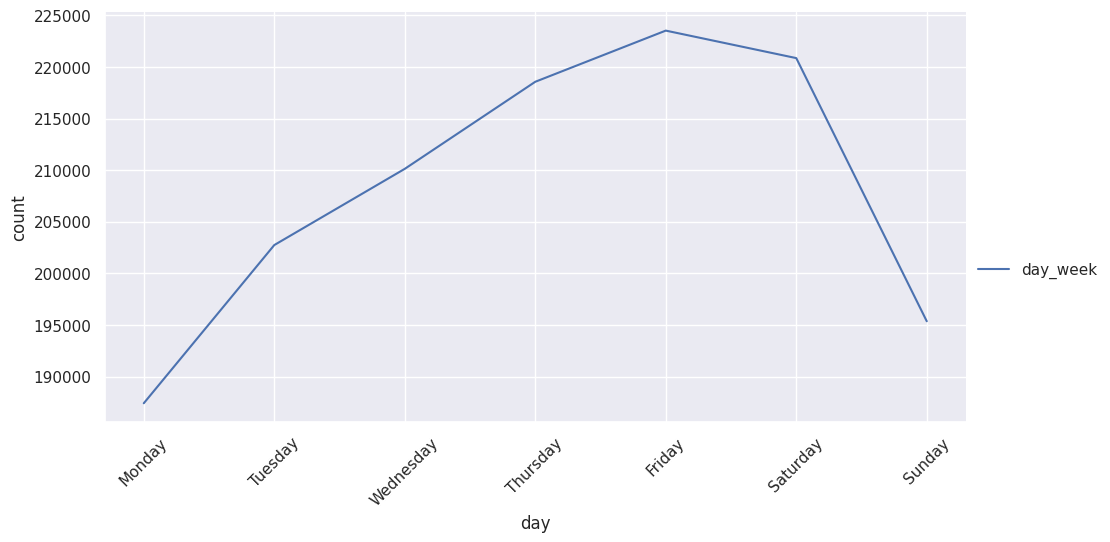

In [324]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.relplot(week, aspect=2, kind='line')
plt.xticks(rotation=45)
plt.ylabel('count')
plt.xlabel('day');

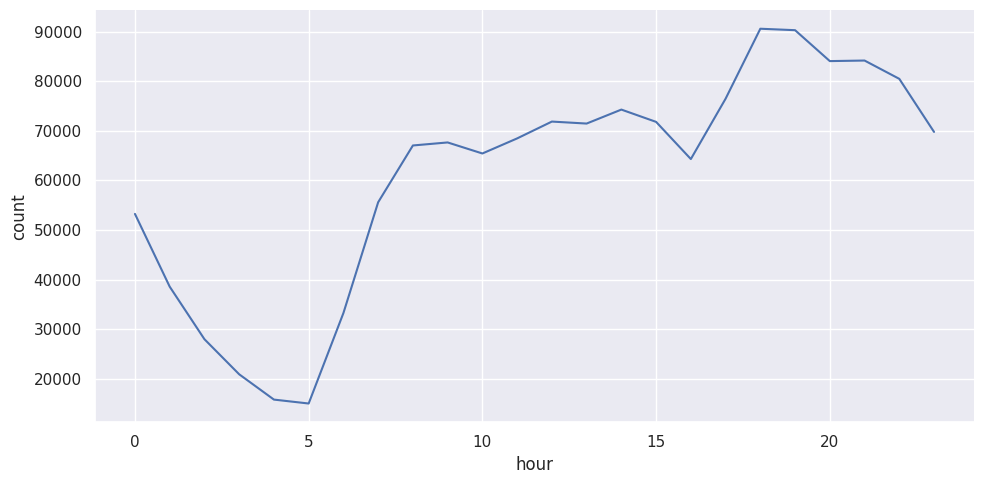

In [325]:
sns.relplot(df['hour'].value_counts().sort_index(), aspect=2, kind='line')
plt.ylabel('count')
plt.xlabel('hour');

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [326]:
df['month'] = df['pickup_datetime'].dt.month_name()

In [327]:
month_hour_df = pd.DataFrame(df.groupby('month')['hour'].value_counts().values, index=df.groupby('month')['hour'].value_counts().index, columns=['count'])

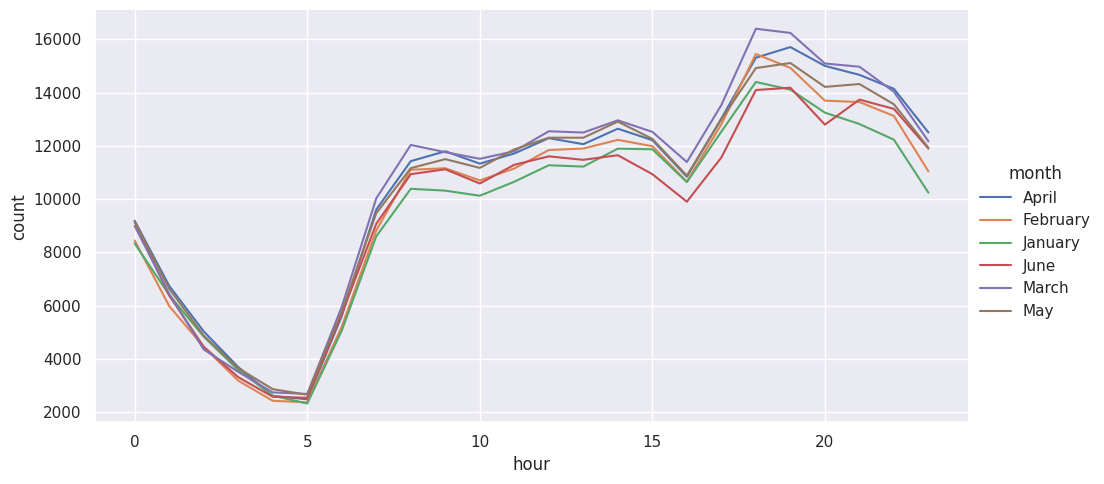

In [328]:
sns.relplot(data = month_hour_df, x='hour', y='count', hue='month', aspect = 2, kind='line');

In [329]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_hour_df = pd.DataFrame(df.groupby('day_week')['hour'].value_counts().values, index=df.groupby('day_week')['hour'].value_counts().index, columns=['count'])

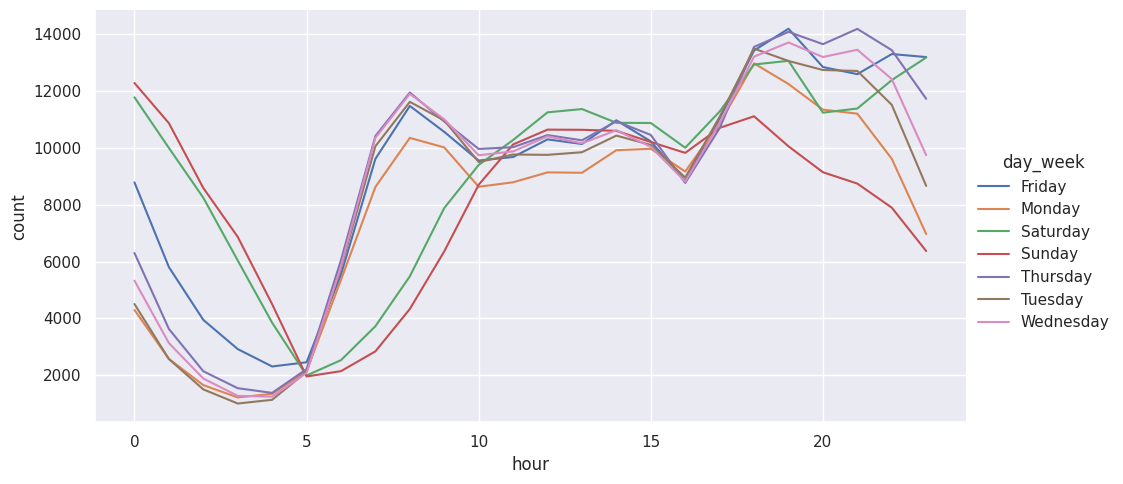

In [330]:
sns.relplot(data = day_hour_df, x='hour', y='count', hue='day_week', aspect = 2, kind='line');

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

В целом по всем месяцам видна одинаковая тенденция заказов в зависимости от времени. Можно заметить, что немного больше заказов в Марте, Апреле и Мае, но в целом каждые месяц примерно одинаковые графики.

По дням недели можно заметить более значительную разницу, с 12 до 5 больше всего заказов в пятницу, субботу и воскресенье, что в целом можно понять), а в утреннее время больше заказывают в рабочие дни. Под вечер каждый день тенденция выравнивается и такси заказывают одинаково много.

По времени суток можно сказать, что больше всего такси заказывают вечером, после 16 часов, это можно объяснить тем, что люди едут с работы домой и тд. Наименее активное время - это 5 часов утра. В среднем в день заказывают около 10.000-12.000 раз.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [331]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)

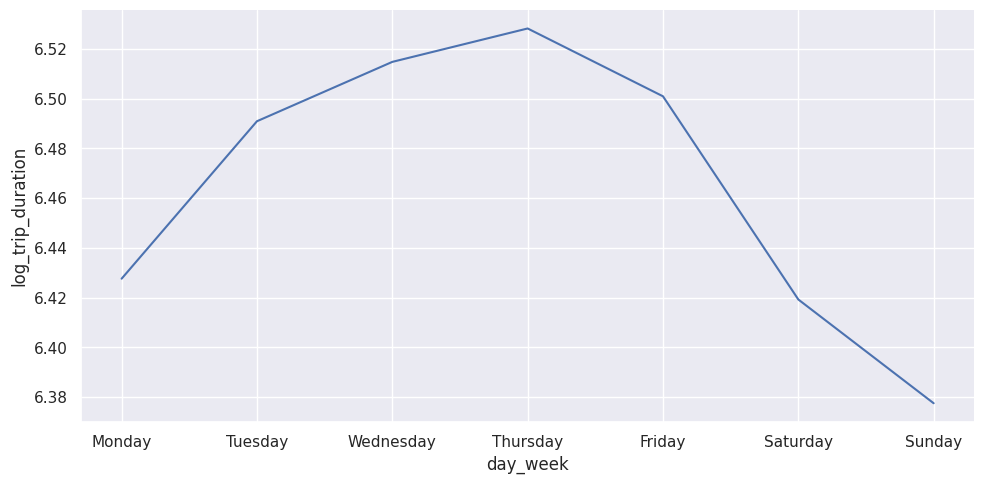

In [332]:
mean_log_week = train.groupby('day_week')['log_trip_duration'].mean().reset_index()
mean_log_week = mean_log_week.reindex([1, 5, 6, 4, 0, 2, 3])
sns.relplot(data = mean_log_week, x = 'day_week', y = 'log_trip_duration', kind = 'line', aspect = 2);

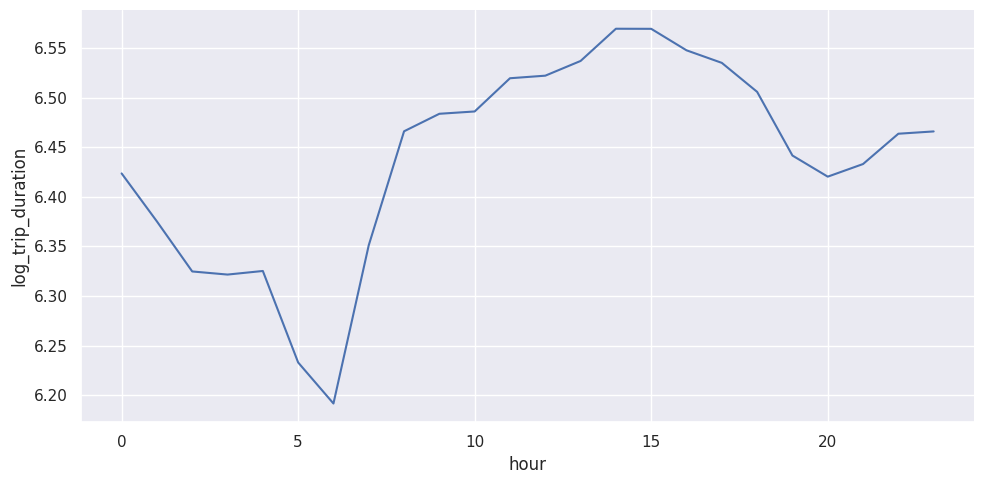

In [333]:
mean_log_hour = train.groupby('hour')['log_trip_duration'].mean().sort_index()
sns.relplot(data = mean_log_hour, kind = 'line', aspect = 2);

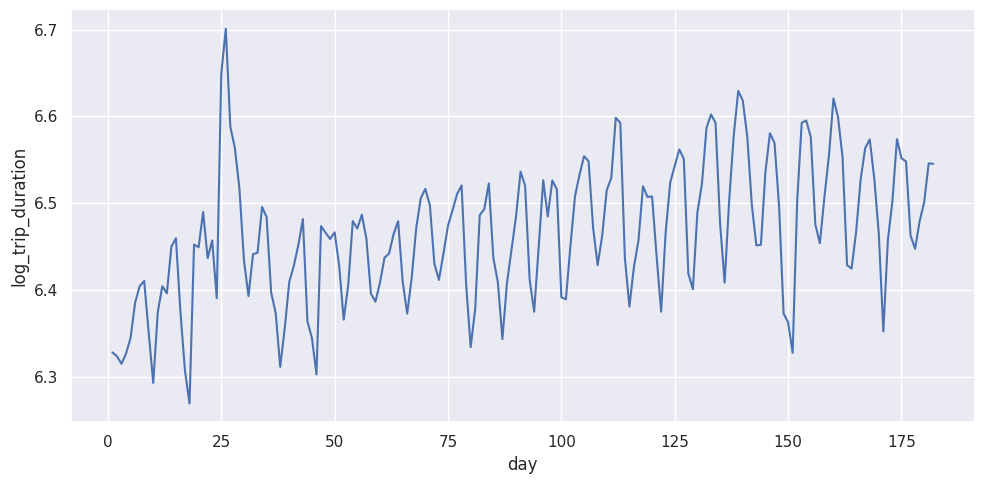

In [334]:
mean_log_day = train.groupby('day')['log_trip_duration'].mean().sort_index()
sns.relplot(data = mean_log_day, kind = 'line', aspect = 2);

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики зависимости таргета от дня недели и от часа в сутках **похожи** на анлогичные графики для числа поездок. Это может быть связано с тем, что количество вызовов такси действительно влияет на плотность движения, на нагрузку транспорта, поэтому большее количество заказов увеличивает время поездки.

В аномальные дни средний таргет значительно просел и был минимальным за весь рассматриваемый период. Это связано с тем, что в те дни такси заказывали очень мало и поэтому, исходя из логики выше, среднее время поездки было меньше.

В целом в зависимости от дня график ведётся себя непостоянно, но в среднем можно заметить, что таргет имеет возрастающую тенденцию

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [335]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['anomaly'] = 0
df.loc[df[df['day'] == 23].index, 'anomaly'] = 1
df.loc[df[df['day'] == 24].index, 'anomaly'] = 1
df
# остальные были добавлены раньше

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day,day_week,hour,month,anomaly
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,Monday,17,March,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,Sunday,0,June,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,Tuesday,11,January,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,Wednesday,19,April,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,Saturday,13,March,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,Friday,13,April,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,Sunday,7,January,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,Friday,6,April,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,Tuesday,15,January,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальные: день недели, аномальность, месяц, час

Числовой: номер дня

День недели, аномальность, месяц и час являются категориальными признаками, так как они представляют собой классы, к которым относятся данные, а номер дня - числовой, поскольку это числовое значение, которое представляет количество дней с начала года.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [336]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
train, test = train_test_split(df, test_size=0.3, random_state=31)

In [337]:
categorical = ['day_week', 'hour', 'month', 'anomaly']
numeric = ['day']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
]) #из семинара-2 2022

In [338]:
X_train = train[['day_week', 'hour', 'month', 'anomaly', 'day']]
X_test = test[['day_week', 'hour', 'month', 'anomaly', 'day']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [339]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [340]:
rmsle(y_test, y_pred)

0.7875942396665002

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [341]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [342]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [343]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Особенно можно заметить, что на карте выделяются от основной массы Аэропорт Кеннеди, Аэропорт Ла-Гвардия. На эти пункты приходится большое количество заказов, однако они находятся достаточно далеко от основного скопления вызовов такси (Манхэттен).

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [344]:
pip install haversine

In [345]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from haversine import haversine, Unit
df['haversine'] = df.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']), unit=Unit.METERS), axis=1)

In [346]:
df['haversine']

0          1498.522849
1          1805.509663
2          6385.107315
3          1485.500475
4          1188.590101
              ...     
1458639    1225.081803
1458640    6049.843936
1458641    7824.616583
1458642    1092.565401
1458643    1134.043528
Name: haversine, Length: 1458644, dtype: float64

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [347]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#тк некоторые значения haversine нулевые
df['log_haversine'] = round(np.log1p(df['haversine']), 3)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [348]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

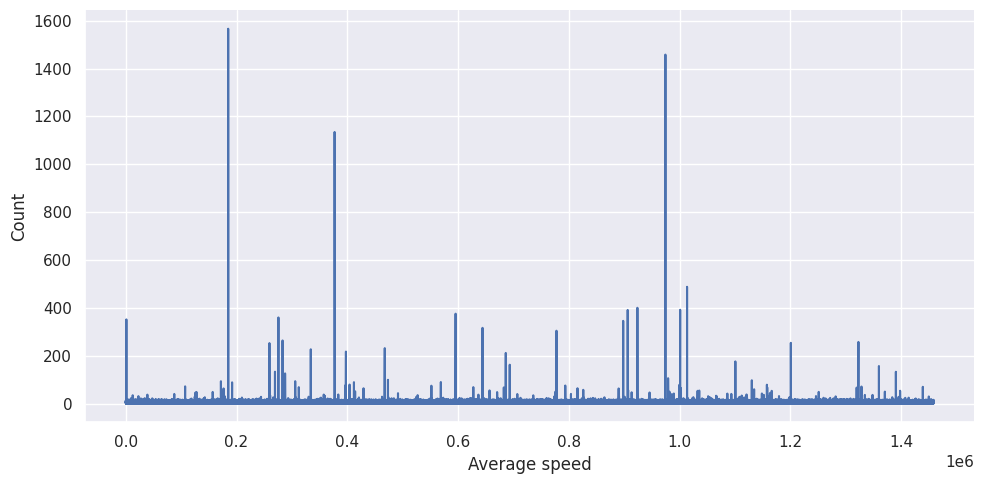

In [349]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.random.seed(213)
df['average_speed'] = df['haversine'] / trip_duration
train, test = train_test_split(df, test_size=0.3, random_state=31)
sns.relplot(train['average_speed'], aspect=2, kind='line')
plt.xlabel('Average speed')
plt.ylabel('Count');

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

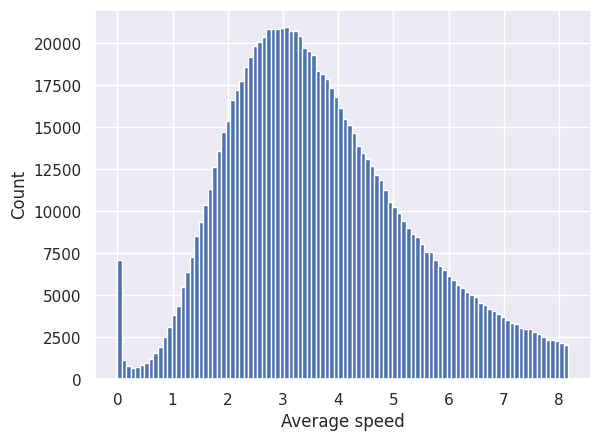

In [350]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
quant = train['average_speed'].quantile(0.95)
#только с plt.hist норм что-то получилось)))))
plt.hist(train[train['average_speed'] <= quant]['average_speed'], bins = 100)
plt.xlabel('Average speed')
plt.ylabel('Count');

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

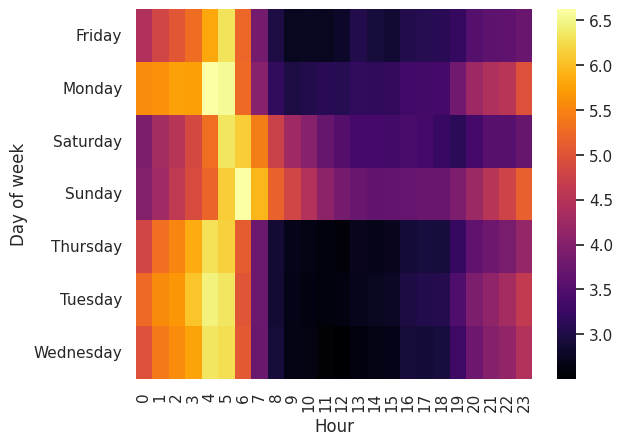

In [351]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speed = df.groupby(['day_week', 'hour'])['average_speed'].median().reset_index()
heat_pivot = median_speed.pivot(index = 'day_week', columns = 'hour', values = 'average_speed')
sns.heatmap(heat_pivot, cmap = 'inferno')
plt.xlabel('Hour')
plt.ylabel('Day of week');

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [352]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop('average_speed', axis = 1)

Скорость может сильно коррелировать со временем и расстоянием, так как происходит из этих показателей, что может привести к переобучению

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Скорость минимальна во вторник, среду, четверг и пятницу с 9 до 12, а максимальна в понедельник и воскресенье в 4 до 6 часов примерно

In [353]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
traffic = [9, 10, 11, 12]
free = [4, 5, 6]
df['traffic_jam'] = 0
df['free_road'] = 0
df.loc[df['hour'].isin(traffic), 'traffic_jam'] = 1
df.loc[df['hour'].isin(free), 'free_road'] = 1

In [354]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day,day_week,hour,month,anomaly,haversine,log_haversine,traffic_jam,free_road
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,74,Monday,17,March,0,1498.522849,7.313,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,164,Sunday,0,June,0,1805.509663,7.499,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,19,Tuesday,11,January,0,6385.107315,8.762,1,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,97,Wednesday,19,April,0,1485.500475,7.304,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,86,Saturday,13,March,0,1188.590101,7.081,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,99,Friday,13,April,0,1225.081803,7.112,0,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,10,Sunday,7,January,0,6049.843936,8.708,0,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,113,Friday,6,April,0,7824.616583,8.965,0,1
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,5,Tuesday,15,January,0,1092.565401,6.997,0,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [355]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#методом проб и ошибок подобрал примерные значения координат, тк по точным не получится найти
df['From LaGuardia'] = 0
df['From Kennedy'] = 0
df['To LaGuardia'] = 0
df['To Kennedy'] = 0
df.loc[(round(df['pickup_longitude'], 3) == -73.873) & ((round(df['pickup_latitude'], 2) == 40.77) | (round(df['pickup_latitude'], 2) == 40.78)), 'From LaGuardia'] = 1
df.loc[(round(df['dropoff_longitude'], 3) == -73.873) & ((round(df['dropoff_latitude'], 2) == 40.77) | (round(df['dropoff_latitude'], 2) == 40.78)), 'To LaGuardia'] = 1
df.loc[(round(df['pickup_longitude'], 3) == -73.780) & ((round(df['pickup_latitude'], 2) == 40.64) | (round(df['pickup_latitude'], 2) == 40.65)), 'From Kennedy'] = 1
df.loc[(round(df['dropoff_longitude'], 3) == -73.780) & ((round(df['dropoff_latitude'], 2) == 40.64) | (round(df['dropoff_latitude'], 2) == 40.65)), 'To Kennedy'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

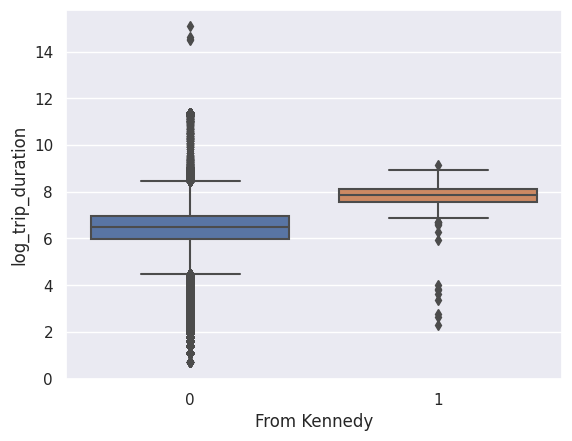

In [356]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(x = df['From Kennedy'], y = df['log_trip_duration']);

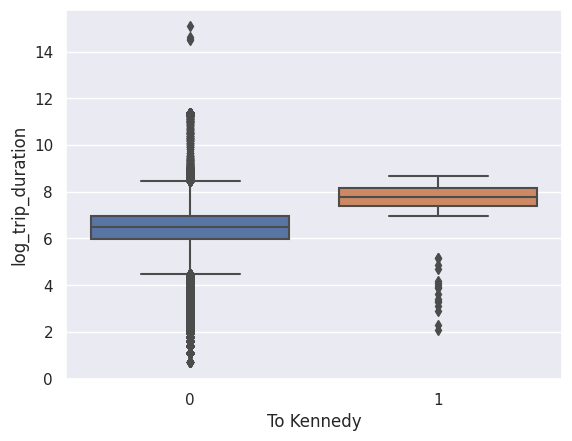

In [357]:
sns.boxplot(x = df['To Kennedy'], y = df['log_trip_duration']);

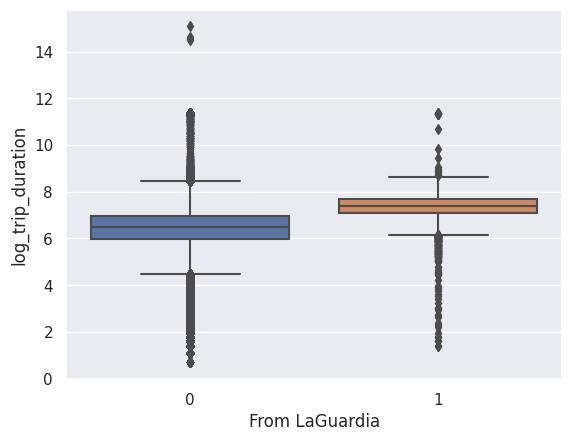

In [358]:
sns.boxplot(x = df['From LaGuardia'], y = df['log_trip_duration']);

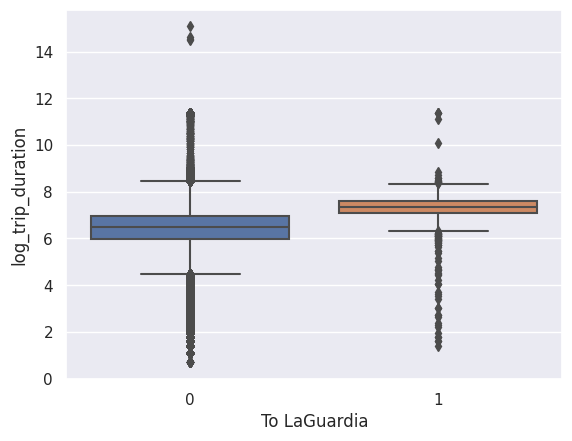

In [359]:
sns.boxplot(x = df['To LaGuardia'], y = df['log_trip_duration']);

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Не очень хорошие, много выбросов, что видно по количеству точек за линиями, хотя сами коробки маленькие, что говорит о том, что разница между минимальным и максимальным временем не велика

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [360]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ver_cell = 4, hor_cell = 3):
        # your code here
        self.ver_cell = ver_cell
        self.hor_cell = hor_cell
        self.ranges = None
        pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        #вручную считал по картам )))))
        min_long, max_long = -74.018621, -73.950030
        min_lat, max_lat = 40.704346, 40.797604
        long_step = abs((max_long - min_long) / self.hor_cell)
        lat_step = abs((max_lat - min_lat) / self.ver_cell)

        self.ranges = {
            'longitude' : (min_long, max_long, long_step),
            'latitude' : (min_lat, max_lat, lat_step)
        }
        return self

    def transform(self, X, y=None):
        # your code here

        min_long, max_long, long_step = self.ranges['longitude']
        min_lat, max_lat, lat_step = self.ranges['latitude']

        #захардкодил как мужчина
        X['start'] = -1
        X['end'] = -1

        X.loc[((X['pickup_longitude'] >= min_long) & (X['pickup_longitude'] < min_long + long_step) & (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] < min_lat + lat_step)), 'start'] = 1
        X.loc[((X['pickup_longitude'] >= min_long + long_step) & (X['pickup_longitude'] < min_long + 2 * long_step) & (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] < min_lat + lat_step)), 'start'] = 2
        X.loc[((X['pickup_longitude'] >= min_long + 2 * long_step) & (X['pickup_longitude'] < min_long + 3 * long_step) & (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] < min_lat + lat_step)), 'start'] = 3
        X.loc[((X['pickup_longitude'] >= min_long) & (X['pickup_longitude'] < min_long + long_step) & (X['pickup_latitude'] >= min_lat + lat_step) & (X['pickup_latitude'] < min_lat + 2 * lat_step)), 'start'] = 4
        X.loc[((X['pickup_longitude'] >= min_long + long_step) & (X['pickup_longitude'] < min_long + 2 * long_step) & (X['pickup_latitude'] >= min_lat + lat_step) & (X['pickup_latitude'] < min_lat + 2 * lat_step)), 'start'] = 5
        X.loc[((X['pickup_longitude'] >= min_long + 2 * long_step) & (X['pickup_longitude'] < min_long + 3 * long_step) & (X['pickup_latitude'] >= min_lat + lat_step) & (X['pickup_latitude'] < min_lat + 2 * lat_step)), 'start'] = 6
        X.loc[((X['pickup_longitude'] >= min_long) & (X['pickup_longitude'] < min_long + long_step) & (X['pickup_latitude'] >= min_lat + 2 * lat_step) & (X['pickup_latitude'] < min_lat + 3 * lat_step)), 'start'] = 7
        X.loc[((X['pickup_longitude'] >= min_long + long_step) & (X['pickup_longitude'] < min_long + 2 * long_step) & (X['pickup_latitude'] >= min_lat + 2 * lat_step) & (X['pickup_latitude'] < min_lat + 3 * lat_step)), 'start'] = 8
        X.loc[((X['pickup_longitude'] >= min_long + 2 * long_step) & (X['pickup_longitude'] < min_long + 3 * long_step) & (X['pickup_latitude'] >= min_lat + 2 * lat_step) & (X['pickup_latitude'] < min_lat + 3 * lat_step)), 'start'] = 9
        X.loc[((X['pickup_longitude'] >= min_long) & (X['pickup_longitude'] < min_long + long_step) & (X['pickup_latitude'] >= min_lat + 3 * lat_step) & (X['pickup_latitude'] < min_lat + min_lat + 4 * lat_step)), 'start'] = 10
        X.loc[((X['pickup_longitude'] >= min_long + long_step) & (X['pickup_longitude'] < min_long + 2 * long_step) & (X['pickup_latitude'] >= min_lat + 3 * lat_step) & (X['pickup_latitude'] < min_lat + 4 * lat_step)), 'start'] = 11
        X.loc[((X['pickup_longitude'] >= min_long + 2 * long_step) & (X['pickup_longitude'] < min_long + 3 * long_step) & (X['pickup_latitude'] >= min_lat + 3 * lat_step) & (X['pickup_latitude'] < min_lat + 4 * lat_step)), 'start'] = 12

        X.loc[((X['dropoff_longitude'] >= min_long) & (X['dropoff_longitude'] < min_long + long_step) & (X['dropoff_latitude'] >= min_lat) & (X['dropoff_latitude'] < min_lat + lat_step)), 'end'] = 1
        X.loc[((X['dropoff_longitude'] >= min_long + long_step) & (X['dropoff_longitude'] < min_long + 2 * long_step) & (X['dropoff_latitude'] >= min_lat) & (X['dropoff_latitude'] < min_lat + lat_step)), 'end'] = 2
        X.loc[((X['dropoff_longitude'] >= min_long + 2 * long_step) & (X['dropoff_longitude'] < min_long + 3 * long_step) & (X['dropoff_latitude'] >= min_lat) & (X['dropoff_latitude'] < min_lat + lat_step)), 'end'] = 3
        X.loc[((X['dropoff_longitude'] >= min_long) & (X['dropoff_longitude'] < min_long + long_step) & (X['dropoff_latitude'] >= min_lat + lat_step) & (X['dropoff_latitude'] < min_lat + 2 * lat_step)), 'end'] = 4
        X.loc[((X['dropoff_longitude'] >= min_long + long_step) & (X['dropoff_longitude'] < min_long + 2 * long_step) & (X['dropoff_latitude'] >= min_lat + lat_step) & (X['dropoff_latitude'] < min_lat + 2 * lat_step)), 'end'] = 5
        X.loc[((X['dropoff_longitude'] >= min_long + 2 * long_step) & (X['dropoff_longitude'] < min_long + 3 * long_step) & (X['dropoff_latitude'] >= min_lat + lat_step) & (X['dropoff_latitude'] < min_lat + 2 * lat_step)), 'end'] = 6
        X.loc[((X['dropoff_longitude'] >= min_long) & (X['dropoff_longitude'] < min_long + long_step) & (X['dropoff_latitude'] >= min_lat + 2 * lat_step) & (X['dropoff_latitude'] < min_lat + 3 * lat_step)), 'end'] = 7
        X.loc[((X['dropoff_longitude'] >= min_long + long_step) & (X['dropoff_longitude'] < min_long + 2 * long_step) & (X['dropoff_latitude'] >= min_lat + 2 * lat_step) & (X['dropoff_latitude'] < min_lat + 3 * lat_step)), 'end'] = 8
        X.loc[((X['dropoff_longitude'] >= min_long + 2 * long_step) & (X['dropoff_longitude'] < min_long + 3 * long_step) & (X['dropoff_latitude'] >= min_lat + 2 * lat_step) & (X['dropoff_latitude'] < min_lat + 3 * lat_step)), 'end'] = 9
        X.loc[((X['dropoff_longitude'] >= min_long) & (X['dropoff_longitude'] < min_long + long_step) & (X['dropoff_latitude'] >= min_lat + 3 * lat_step) & (X['dropoff_latitude'] < min_lat + min_lat + 4 * lat_step)), 'end'] = 10
        X.loc[((X['dropoff_longitude'] >= min_long + long_step) & (X['dropoff_longitude'] < min_long + 2 * long_step) & (X['dropoff_latitude'] >= min_lat + 3 * lat_step) & (X['dropoff_latitude'] < min_lat + 4 * lat_step)), 'end'] = 11
        X.loc[((X['dropoff_longitude'] >= min_long + 2 * long_step) & (X['dropoff_longitude'] < min_long + 3 * long_step) & (X['dropoff_latitude'] >= min_lat + 3 * lat_step) & (X['dropoff_latitude'] < min_lat + 4 * lat_step)), 'end'] = 12

        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [361]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train, test = train_test_split(df, test_size=0.3, random_state=31)
categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Ridge())
])

X_train = train[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
X_test = test[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [362]:
rmsle(y_test, y_pred)

0.5242965929030822

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

Vendor_id: разные перевозчики предлагают услуги разного качества (автопарк, водители и тд) и знание их может помочь более точно предсказать ожидаемое время поездки

Passenger_count: большее количество пассажиров может затрачивать большее время на поездку, тк всех надо посадить/высадить в разных местах

Store_and_fwd_flag: если данные уже были в базе, то это может помочь заранее построить наиболее оптимальный маршрут, что приведёт к уменьшению времени поездки

In [363]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [364]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [365]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

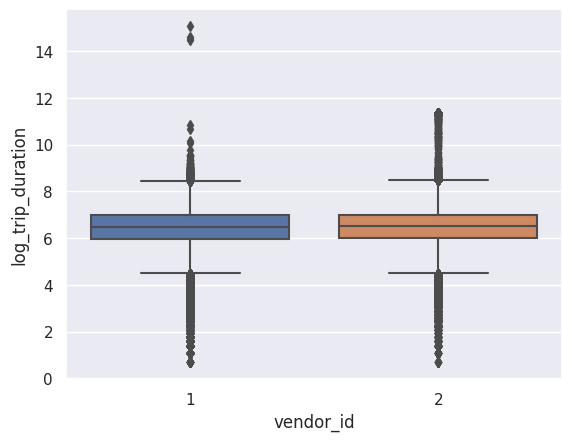

In [366]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(x = df['vendor_id'], y = df['log_trip_duration']);

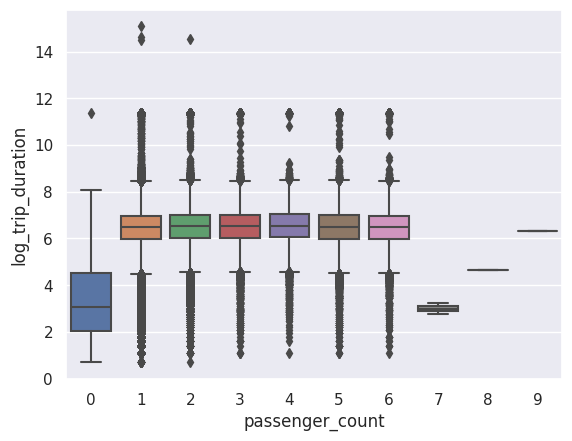

In [367]:
sns.boxplot(x = df['passenger_count'], y = df['log_trip_duration']);

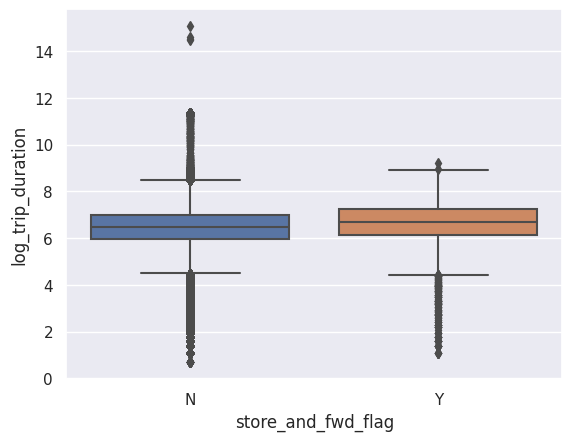

In [368]:
sns.boxplot(x = df['store_and_fwd_flag'], y = df['log_trip_duration']);

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [369]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['vendor_id'] = df['vendor_id'] - 1
df.loc[ df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
df.loc[ df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Нет, коробки достаточно маленькие

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [370]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df, test_size=0.3, random_state=31)
categorical = ['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Ridge())
])

X_train = train[['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
X_test = test[['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'free_road', 'From LaGuardia', 'To LaGuardia', 'From Kennedy', 'To Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [371]:
rmsle(y_test, y_pred)

0.52396464428128

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [372]:
df = df.drop(columns=['vendor_id', 'store_and_fwd_flag', 'passenger_count'])

Ощутимого улучшения не дали)

In [373]:
df

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,day,day_week,hour,month,anomaly,haversine,log_haversine,traffic_jam,free_road,From LaGuardia,From Kennedy,To LaGuardia,To Kennedy
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,6.122493,74,Monday,17,March,0,1498.522849,7.313,0,0,0,0,0,0
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,6.498282,164,Sunday,0,June,0,1805.509663,7.499,0,0,0,0,0,0
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,7.661527,19,Tuesday,11,January,0,6385.107315,8.762,1,0,0,0,0,0
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,6.063785,97,Wednesday,19,April,0,1485.500475,7.304,0,0,0,0,0,0
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,6.077642,86,Saturday,13,March,0,1188.590101,7.081,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,6.658011,99,Friday,13,April,0,1225.081803,7.112,0,0,0,0,0,0
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,6.486161,10,Sunday,7,January,0,6049.843936,8.708,0,0,0,0,0,0
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,6.639876,113,Friday,6,April,0,7824.616583,8.965,0,1,0,0,0,0
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,5.924256,5,Tuesday,15,January,0,1092.565401,6.997,0,0,0,0,0,0


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

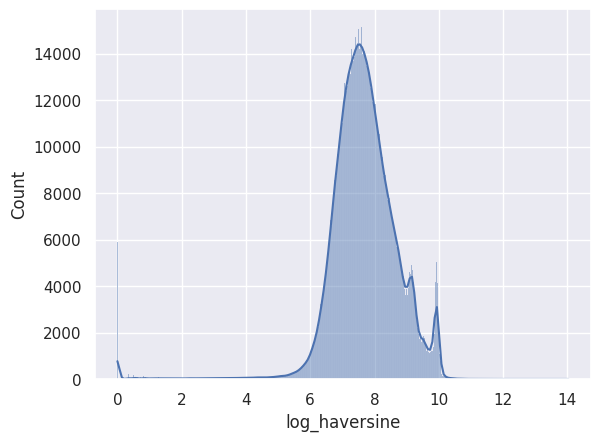

In [374]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(round(df['log_haversine'], 4), kde=True);

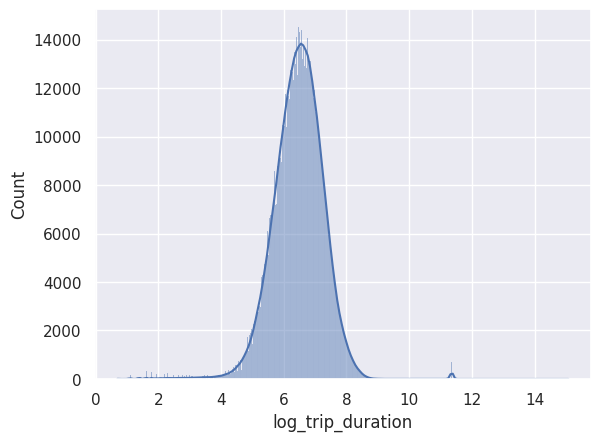

In [375]:
sns.histplot(round(df['log_trip_duration'], 4), kde=True);

In [376]:
#удаляю выбросы по квантилям, выбросами считаю хвосты

In [377]:
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)
train = train[(train['log_haversine'] >= train['log_haversine'].quantile(0.1)) & (train['log_haversine'] <= train['log_haversine'].quantile(0.95))]
train = train[(train['log_trip_duration'] >= train['log_trip_duration'].quantile(0.1)) & (train['log_trip_duration'] <= train['log_trip_duration'].quantile(0.90))]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [378]:
df['free_road'].value_counts()

0    1394602
1      64042
Name: free_road, dtype: int64

In [379]:
df['traffic_jam'].value_counts()

0    1185195
1     273449
Name: traffic_jam, dtype: int64

In [380]:
#категории, связанные с точками прибытия/отъезда являются достаточно редкими, поэтому объединим 4 в 2
#тк в признаке free_road достаточно мало 1, то из traffic_jam и free_road оставим один бинарный признак: загружены ли дороги или нет
df['LaGuardia'] = 0
df.loc[(df['To LaGuardia'] == 1) | (df['From LaGuardia'] == 1), 'LaGuardia'] = 1
df['Kennedy'] = 0
df.loc[(df['To Kennedy'] == 1) | (df['From Kennedy'] == 1), 'LaGuardia'] = 1
df = df.drop(columns=['To LaGuardia', 'From LaGuardia', 'From Kennedy', 'To Kennedy', 'free_road'])

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [381]:
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)
train = train[(train['log_haversine'] >= train['log_haversine'].quantile(0.1)) & (train['log_haversine'] <= train['log_haversine'].quantile(0.95))]
train = train[(train['log_trip_duration'] >= train['log_trip_duration'].quantile(0.1)) & (train['log_trip_duration'] <= train['log_trip_duration'].quantile(0.90))]

categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Ridge())
])

X_train = train[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
X_test = test[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [382]:
rmsle(y_test, y_pred)

0.5394420067149696

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [383]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
num_before = df.shape[1] - 10 #10 = некатегориальные столбцы типо id и datetime, а также численные переменные
num_before

7

In [384]:
encoded = pd.get_dummies(df, columns=['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy'])
num_after = encoded.shape[1] - 10
num_after

44

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [385]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)
train = train[(train['log_haversine'] >= train['log_haversine'].quantile(0.1)) & (train['log_haversine'] <= train['log_haversine'].quantile(0.95))]
train = train[(train['log_trip_duration'] >= train['log_trip_duration'].quantile(0.1)) & (train['log_trip_duration'] <= train['log_trip_duration'].quantile(0.90))]

categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Lasso())
])

X_train = train[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
X_test = test[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [386]:
rmsle(y_test, y_pred)

0.7966347986135871

Ridge-регрессия значительно лучше, как видно по нашей метрике)

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [387]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)
train = train[(train['log_haversine'] >= train['log_haversine'].quantile(0.1)) & (train['log_haversine'] <= train['log_haversine'].quantile(0.95))]
train = train[(train['log_trip_duration'] >= train['log_trip_duration'].quantile(0.1)) & (train['log_trip_duration'] <= train['log_trip_duration'].quantile(0.90))]

mini_train, valid = train_test_split(train, test_size=0.2, random_state=31)
alphas = np.logspace(-3, 3, 7)

categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Ridge())
])

X_mini_train = mini_train[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
X_valid = valid[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y_mini_train = mini_train['log_trip_duration']
y_valid = valid['log_trip_duration']

ridge_params = {'regression__alpha': alphas}
ridge_cv = GridSearchCV(pipeline, ridge_params, cv=5)
ridge_cv.fit(X_mini_train, y_mini_train)

ridge_rmsle = rmsle(y_valid, ridge_cv.predict(X_valid))

lasso_params = {'regression__alpha': alphas}
lasso_cv = GridSearchCV(pipeline, lasso_params, cv=5)
lasso_cv.fit(X_mini_train, y_mini_train)

lasso_rmsle = rmsle(y_valid, lasso_cv.predict(X_valid))


In [388]:
ridge_rmsle

0.3008354688972326

In [389]:
ridge_rmsle - lasso_rmsle
#ridge и lasso показали одинаковое качество на метрике rmsle (которое кстати гораздо лучше предыдущих)

0.0

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [390]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
alphas = np.logspace(-3, 3, 7)

categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Lasso())
])

zeros = []
for alpha in alphas:
  pipeline.set_params(regression__alpha=alpha)
  pipeline.fit(X_mini_train, y_mini_train)
  weights = pipeline.named_steps['regression'].coef_
  zeros.append(np.sum(weights == 0))

<Axes: >

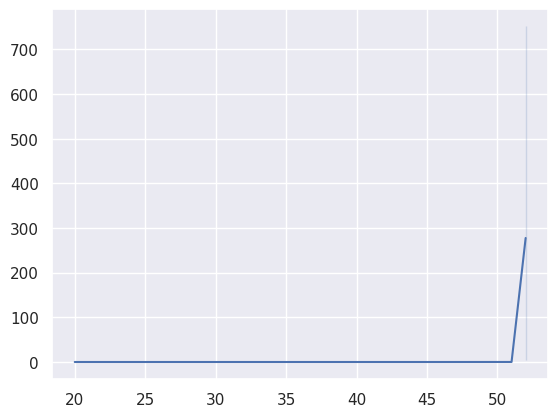

In [391]:
sns.lineplot(y = alphas, x = zeros)

Бывает))))))

In [392]:
lasso_cv.best_params_['regression__alpha']

0.01

In [393]:
categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Lasso())
])

pipeline.set_params(regression__alpha=0)
pipeline.fit(X_mini_train, y_mini_train)

ridge_rmsle = rmsle(y_valid, pipeline.predict(X_valid))

pipeline.set_params(regression__alpha=0.01)
pipeline.fit(X_mini_train, y_mini_train)

lasso_rmsle = rmsle(y_valid, pipeline.predict(X_valid))

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25121.4154206869, tolerance: 9.651760860934434
  model = cd_fast.sparse_enet_coordinate_descent(


In [394]:
lasso_rmsle - ridge_rmsle

0.022175738824384172

*0.02 получилось, но я не верю что-то*

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [408]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
grid = MapGridTransformer(ver_cell = 4, hor_cell = 3)
grid.fit(df)
df_1 = grid.transform(df)

In [415]:
df_1['start_and_end'] = df['start'].astype(str) + ' - ' + df['end'].astype(str)
df['pop_pairs'] = '-1'
pop_pairs = df_1['start_and_end'].value_counts().head(100).index.tolist()
df.loc[ df['start_and_end'].isin(pop_pairs), 'pop_pairs'] = df['start_and_end']

In [417]:
df = df.drop('start_and_end', axis = 1)
df

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,day,day_week,hour,month,anomaly,haversine,log_haversine,traffic_jam,LaGuardia,Kennedy,start,end,pop_pairs
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,6.122493,74,Monday,17,March,0,1498.522849,7.313,0,0,0,8,9,8 - 9
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,6.498282,164,Sunday,0,June,0,1805.509663,7.499,0,0,0,5,4,5 - 4
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,7.661527,19,Tuesday,11,January,0,6385.107315,8.762,1,0,0,8,1,8 - 1
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,6.063785,97,Wednesday,19,April,0,1485.500475,7.304,0,0,0,1,1,1 - 1
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,6.077642,86,Saturday,13,March,0,1188.590101,7.081,0,0,0,11,11,11 - 11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,6.658011,99,Friday,13,April,0,1225.081803,7.112,0,0,0,5,5,5 - 5
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,6.486161,10,Sunday,7,January,0,6049.843936,8.708,0,0,0,4,12,4 - 12
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,6.639876,113,Friday,6,April,0,7824.616583,8.965,0,0,0,9,1,9 - 1
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,5.924256,5,Tuesday,15,January,0,1092.565401,6.997,0,0,0,5,8,5 - 8


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [419]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.random.seed(213)
train, test = train_test_split(df, test_size=0.3, random_state=31)
train = train[(train['log_haversine'] >= train['log_haversine'].quantile(0.1)) & (train['log_haversine'] <= train['log_haversine'].quantile(0.95))]
train = train[(train['log_trip_duration'] >= train['log_trip_duration'].quantile(0.1)) & (train['log_trip_duration'] <= train['log_trip_duration'].quantile(0.90))]

categorical = ['day_week', 'hour', 'month', 'anomaly', 'traffic_jam', 'LaGuardia', 'Kennedy', 'pop_pairs']
numeric = ['day', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric),
    ('grid', MapGridTransformer(ver_cell = 4, hor_cell = 3), ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
])

pipeline = Pipeline(steps=[
    ('ohe_scaling_and_grid', column_transformer),
    ('regression', Ridge())
])

X_train = train[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pop_pairs']]
X_test = test[['day_week', 'hour', 'month', 'anomaly', 'log_haversine', 'traffic_jam', 'LaGuardia', 'Kennedy', 'day', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pop_pairs']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [420]:
rmsle(y_test, y_pred)

0.5236816283777365

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src = 'https://m.media-amazon.com/images/I/71ucTT-7QkL._AC_UF894,1000_QL80_.jpg'>